<a href="https://colab.research.google.com/github/chhitij/data-science-ml/blob/main/DL/agriculture_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount the google drive

In [2]:
cd /content/drive/MyDrive/data-science-project


/content/drive/MyDrive/data-science-project


In [3]:
!ls   


PlantVillage  PlantVillage.zip	Pototao_desies.rar


In [4]:
!unzip PlantVillage.zip

Archive:  PlantVillage.zip
replace PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [6]:
DATA_PATH = '/content/drive/MyDrive/data-science-project/PlantVillage'
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3

In [7]:
# load the dataset

dataset = tf.keras.preprocessing.image_dataset_from_directory(DATA_PATH, shuffle=True, 
                                                              image_size=(IMAGE_SIZE,  IMAGE_SIZE),
                                                              batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [8]:
# batch size : 2152/32

In [9]:
# get All the class name

class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
# exploring the dataset

for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 2 0 1 1 1 1]


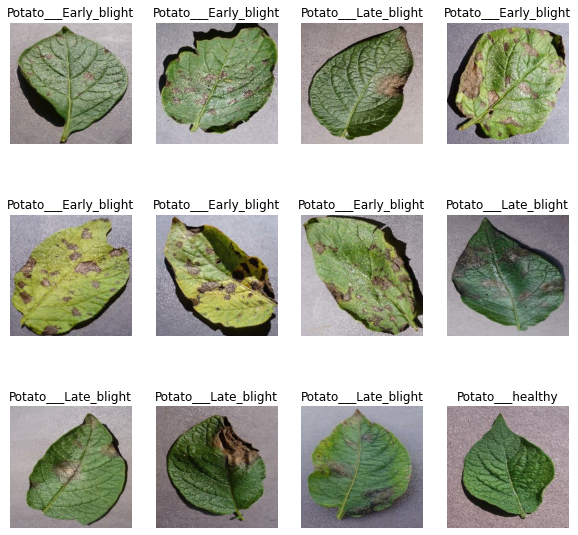

In [11]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')


In [12]:
# Steps

1. model architecture
2. model compilation
3. model.fit

SyntaxError: ignored

In [ ]:
1: training - dataset to be used while training 
2  validation - dataset to be tested againt while training 
3: test - dataset to be tested agianst after we trained model

In [ ]:
80% training
20% - 10% validation and 10% test

In [25]:
train_ds = dataset.take(54)
len(train_ds)

testing_ds = dataset.skip(54)
len(testing_ds)

test_ds = testing_ds.take(7)
print(len(test_ds))

validation_ds = testing_ds.skip(7)
print(len(validation_ds))


7
7


In [ ]:
complie- optimizer ,accuracy, loss
-how to save a model
-how flask

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(36, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
# model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(3,activation='softmax'))

In [22]:
model.compile(optimizer='adam' , loss = tf.keras.losses.sparse_categorical_crossentropy , metrics=['accuracy'])


In [38]:
from keras.callbacks import ModelCheckpoint

In [40]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='loss', save_best_only=True)

In [42]:
history = model.fit(train_ds , batch_size=BATCH_SIZE , epochs=15, validation_data=validation_ds, callbacks=[checkpoint])


Epoch 1/15
54/54 [==============================] - 14s 248ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 2/15
54/54 [==============================] - 14s 248ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9950
Epoch 3/15
54/54 [==============================] - 14s 249ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9950
Epoch 4/15
54/54 [==============================] - 14s 255ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9950
Epoch 5/15
54/54 [==============================] - 14s 249ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9950
Epoch 6/15
54/54 [==============================] - 14s 245ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/15
54/54 [==============================] - 14s 254ms/step - loss: 7.4358e-04 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.

In [ ]:
# ls to save best model save

In [29]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
model.evaluate(test_ds)

7/7 [==============================] - 5s 99ms/step - loss: 0.0024 - accuracy: 1.0000


[0.0023857387714087963, 1.0]

In [32]:
model.save('potato_class_99.h5')

In [35]:
import numpy as np


In [37]:
# loading of a model

loaded_model = tf.keras.models.load_model('potato_class_99.h5')

image_path = '/content/drive/MyDrive/data-science-project/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

test_image = tf.keras.preprocessing.image.load_img(image_path , target_size = (256 , 256))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image , axis = 0)
print(test_image.shape)
pred_value = loaded_model.predict(test_image)
class_names[np.argmax(pred_value)]


(1, 256, 256, 3)


'Potato___Early_blight'